In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.decomposition import PCA

from iaml_cw2_helpers import *
from iaml212cw2_my_helpers import *

In [2]:
X, Y = load_Q1_dataset()

Xtrn = X[100:,:]; Ytrn = Y[100:] # training set
# print(Xtrn.shape, Ytrn.shape)
Xtst = X[0:100,:]; Ytst = Y[0:100] # testing set

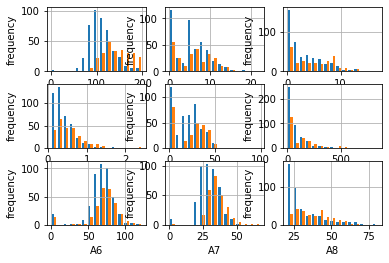

In [3]:
# Q1.1
def iaml212cw2_q1_1():
    Xa = Xtrn[np.where(Ytrn==0)[0]] #instances of class 0
    Xb = Xtrn[np.where(Ytrn==1)[0]] #instances of class 1

    fig, axs = plt.subplots(3, 3) #ploting 3 by 3 histogram
    axs = axs.ravel()

    for i in range(9):
        axs[i].hist([Xa[:,i], Xb[:,i]], bins=15)
        axs[i].set(xlabel=f"A{i}")

    for ax in axs.flat:
        ax.set(ylabel='frequency')
        ax.grid()
        # ax.label_outer()
    plt.savefig("results/1_1.png")
    plt.show()
iaml212cw2_q1_1()

In [4]:
# Q1.2
def iaml212cw2_q1_2():
    for i in range(9):
        print(np.corrcoef(Xtrn[:,i], Ytrn))
iaml212cw2_q1_2()

[[1.        0.4911759]
 [0.4911759 1.       ]]
[[1.        0.0874059]
 [0.0874059 1.       ]]
[[1.         0.22728719]
 [0.22728719 1.        ]]
[[1.         0.20736605]
 [0.20736605 1.        ]]
[[1.         0.10772035]
 [0.10772035 1.        ]]
[[1.        0.1856714]
 [0.1856714 1.       ]]
[[1.         0.07626074]
 [0.07626074 1.        ]]
[[1.         0.30445377]
 [0.30445377 1.        ]]
[[1.         0.24034733]
 [0.24034733 1.        ]]


The unbiased sample variance of each attribute are [[1.47690983e+04 5.00000000e+00]
 [1.00643383e+03 0.00000000e+00]
 [3.84441702e+02 6.00000000e+00]
 [2.54105042e+02 4.00000000e+00]
 [1.39627696e+02 8.00000000e+00]
 [6.35046985e+01 7.00000000e+00]
 [1.67234273e+01 1.00000000e+00]
 [1.15959710e+01 2.00000000e+00]
 [1.05915369e-01 3.00000000e+00]]


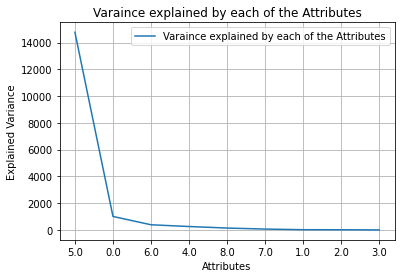

The sum of all the variances is 16645.63659972226
Cumulative explained variance ratio of each Attributes are [0.88726545 0.94772778 0.97082342 0.98608898 0.99447723 0.99829233
 0.999297   0.99999364 1.        ]


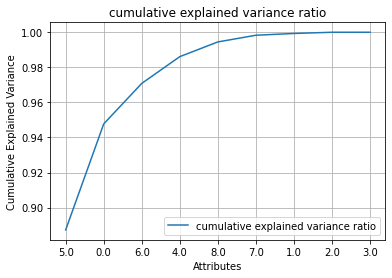

In [5]:
def iaml212cw2_q1_4():
    samVar = np.zeros((9,2)) #initialising numpy array to store the unbiased smaple variance
    # print(samVar)
    for i in range(9):
        #computing unbiased sample variance of each attribute
        vari = np.array([np.var(Xtrn[:,i], axis=0, ddof=1),str(i)])
        samVar[i]=vari
    samVar = samVar[samVar[:,0].argsort()[::-1]] #sorting in descending order
#     print(samVar)
    print(f"The unbiased sample variance of each attribute are {samVar}")
    # print(samVar[:,0])

    #Q1.4.1 plot
    plt.plot(samVar[:,0], label="Varaince explained by each of the Attributes")
    plt.title("Varaince explained by each of the Attributes")
    plt.xlabel("Attributes")
    plt.ylabel("Explained Variance")
    plt.xticks(np.arange(9), samVar[:,1].astype(str))
    plt.legend()
    plt.grid()
    plt.savefig("results/1_4_1.png")
    plt.show()

    sum = samVar.sum(axis=0)[0]
    print(f"The sum of all the variances is {sum}")
    cumsamVar = np.cumsum(samVar[:,0]/sum)
    print(f"Cumulative explained variance ratio of each Attributes are {cumsamVar}")
    #Q1.4.2 plot
    plt.plot(cumsamVar, label="cumulative explained variance ratio")
    plt.title("cumulative explained variance ratio")
    plt.xlabel("Attributes")
    plt.ylabel("Cumulative Explained Variance")
    plt.xticks(np.arange(9), samVar[:,1].astype(str))
    plt.legend()
    plt.grid()
    plt.savefig("results/1_4_2.png")
    plt.show()

iaml212cw2_q1_4() 

The total amount of variance is 16645.636599722264


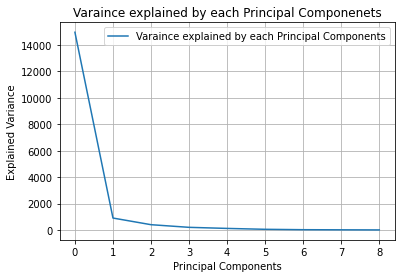

cumsumVar is [0.89934746 0.95338182 0.97716884 0.98891039 0.99575502 0.9985324
 0.99952546 0.99999406 1.        ]


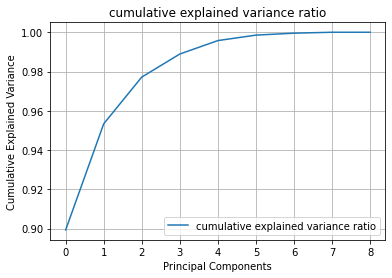

In [6]:
# # Q1.5
def iaml212cw2_q1_5():
    pca = PCA().fit(Xtrn)
#     print(pca.explained_variance_)
    # print(pca)
    # print(pca.explained_variance_)
    # print(np.cumsum(pca.explained_variance_ratio_))
    print(f"The total amount of variance is {sum(pca.explained_variance_)}")

    plt.plot(pca.explained_variance_, label="Varaince explained by each Principal Components")
    plt.title("Varaince explained by each Principal Componenets")
    plt.xlabel("Principal Components")
    plt.ylabel("Explained Variance")
    # plt.xticks(np.arange(9), samVar[:,1].astype(str))
    plt.legend()
    plt.grid()
    plt.savefig("results/1_5_1.png")
    plt.show()

    print(f"cumsumVar is {np.cumsum(pca.explained_variance_ratio_)}")
    plt.plot(np.cumsum(pca.explained_variance_ratio_), label="cumulative explained variance ratio")
    plt.title("cumulative explained variance ratio")
    plt.xlabel("Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    # plt.xticks(np.arange(9), samVar[:,1].astype(str))
    plt.legend()
    plt.grid()
    plt.savefig("results/1_5_2.png")
    plt.show()
iaml212cw2_q1_5()   # comment this out when you run the function

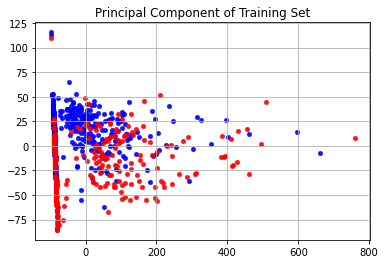

In [7]:
pca = PCA(2)
Xtrn_m = Xtrn - Xtrn.mean(axis=0)
x2d = pca.fit(Xtrn_m)
compo = x2d.components_
colours = ['b','r']

sub_cats = [0,1]
newx = np.dot(Xtrn_m, compo.T)
for colour, target_name in zip(colours, sub_cats):
    plt.scatter(newx[Ytrn==target_name, 0], newx[Ytrn==target_name, 1], color=colour, alpha=.8, s=10, lw=2)
    
plt.grid()
plt.title("Principal Component of Training Set")
plt.show()

In [8]:
# print(np.corrcoef(Xtrn[0], compo[0]))
# print(np.corrcoef(Xtrn[1], compo[1]))
for i in range(9):
    print(np.corrcoef(Xtrn[i], compo[0])[0][1], np.corrcoef(Xtrn[i], compo[1])[0][1])
    

-0.2076731271420587 -0.9310363588544776
0.8353127256620382 -0.3639179828796262
0.7993551367535905 -0.3614813786079188
-0.22454738572615635 -0.8444779281330523
-0.20903886339677016 -0.9041725211382146
0.7482611207098606 -0.4950955280001976
0.3910256023307844 -0.6368332286594779
0.6633557057541077 -0.4086936844108837
0.6428945923096928 -0.5733661493931103


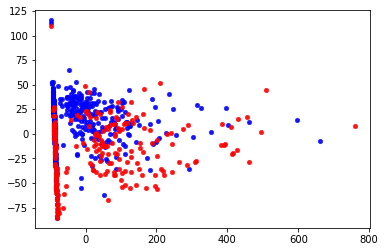

In [9]:
pca = PCA(2)
x2d = pca.fit_transform(Xtrn)
colours = ['b','r']
sub_cats = [0,1]
lw=2
for colour, target_name in zip(colours, sub_cats):
    plt.scatter(x2d[Ytrn ==  target_name, 0], x2d[Ytrn == target_name, 1], color=colour, alpha=.8, lw=lw,
                label=target_name, s=10) 

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrn)
Xtrn_s = scaler.transform(Xtrn)
Xtst_s = scaler.transform(Xtst)

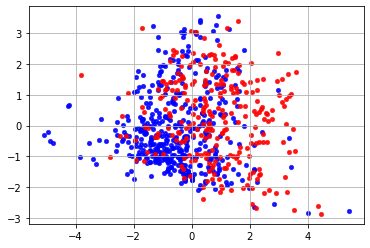

In [11]:
Xtrn_sm = Xtrn_s - Xtrn_s.mean(axis=0)
pca = PCA(2)
x2d = pca.fit(Xtrn_sm)
compo = x2d.components_ #PCA Components 
newx = np.dot(Xtrn_sm, compo.T)
classes = [0,1]
for colour, target_name in zip(colours, classes):
    plt.scatter(newx[Ytrn==target_name, 0], newx[Ytrn==target_name, 1], c = colour, alpha=.8, lw=2, 
                label=target_name, s=10)

plt.grid()
plt.show()


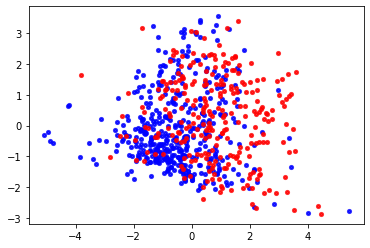

In [12]:
pca = PCA(2)
x2d = pca.fit_transform(Xtrn_s)
colours = ['b','r']
sub_cats = [0,1]
lw=2
for color, target_name in zip(colours, sub_cats):
    plt.scatter(x2d[Ytrn ==  target_name, 0], x2d[Ytrn == target_name, 1], color=color, alpha=.8, lw=lw,
                label=target_name, s=10 ) 